Copied example from Example-1 and made own processing to extract all numbers used in each item

-Shayne M. Plourde

## Punchline:

percentage of news with numbers that are true for kaggle_df: 

37.42458914083628 percent

Percentage of Kaggle that uses numbers: 

0.1070649026682703

percentage of news with numbers in title that are true for liar_df: 

55.13203786746388 percent

Percentage of Liar that uses numbers: 

0.3919921875


### The difference in number use for the Kaggle DF was significantly different from true to false, but the overall useage of numbers was too low to make meaningful predictions from.

# Read in datasets

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors as nei


In [5]:
# reading kaggle dataset
df=pd.read_csv("../Datasets/fake-news/train.csv")
# removing entries without text
df=df[~df['text'].isna()]
df['Numbs'] = df.text.str.findall(r'(\d+(?:\.\d+)?)')
df['UsesNumbs'] = 0
df.loc[df['Numbs'].str.len() > 0, 'UsesNumbs'] = 1
df['how_many_numbs'] = df['Numbs'].str.len()
df.head()

,id,title,author,text,label,Numbs,UsesNumbs,how_many_numbs
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[30, 2016, 28, 2016, 25, 78, 2012, 30]",1,8
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"[48, 1969, 2016, 400, 1969, 2016, 48, 38, 1960...",1,10
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"[29, 2016, 2003, 9, 11, 19, 2003, 13, 16]",1,9
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,"[15, 2014, 15, 28, 15, 13, 15, 19, 42, 45, 18,...",1,13
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,"[35, 36, 19]",1,3


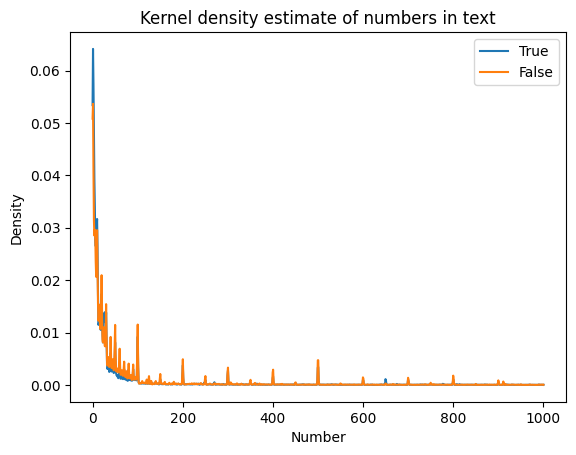

In [24]:
## column Numbs contains lists of numbers in each row. I need to extract these numbers and make a histogram of seperated by column label
## I will also make a new column that indicates whether the text contains numbers or not

# making a list of all numbers in the dataset
all_numbs_truth=[]
all_numbs_false=[]
for i in range(len(df)):
    if df['label'].iloc[i]==1:
        all_numbs_truth.extend(df['Numbs'].iloc[i])
    else:
        all_numbs_false.extend(df['Numbs'].iloc[i])
#limiting the range to 0-1000
all_numbs_truth=[float(i) for i in all_numbs_truth if float(i)<1000]
all_numbs_false=[float(i) for i in all_numbs_false if float(i)<1000]
# making a kernaldensity plot of the numbers with nei.KernelDensity
kde = nei.KernelDensity(kernel='gaussian', bandwidth=0.75).fit(np.array(all_numbs_truth).reshape(-1, 1))
kde2 = nei.KernelDensity(kernel='gaussian', bandwidth=0.75).fit(np.array(all_numbs_false).reshape(-1, 1))
x=np.linspace(0,1000,1000)
logprob = kde.score_samples(x.reshape(-1,1))
logprob2 = kde2.score_samples(x.reshape(-1,1))
plt.plot(x, np.exp(logprob),label='True')
plt.plot(x, np.exp(logprob2),label='False')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Density')
plt.title('Kernel density estimate of numbers in text')
plt.show()


In [10]:
# df.to_csv('../Datasets/fake-news/numbs_train.csv')

In [4]:
df=pd.read_csv("../Datasets/fake-news/test.csv")
df=df[~df['text'].isna()]
df['Numbs'] = df.text.str.findall(r'(\d+(?:\.\d+)?)')
df['UsesNumbs'] = 0
df.loc[df['Numbs'].str.len() > 0, 'UsesNumbs'] = 1
df['how_many_numbs'] = df['Numbs'].str.len()
df.head()
# df.to_csv('../Datasets/fake-news/numbs_test.csv')

,id,title,author,text,Numbs,UsesNumbs,how_many_numbs
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","[150, 1, 25, 1, 500, 4, 50, 000, 50, 000, 7, 7...",1,30
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,"[08.11, 2016]",1,2
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,"[3.8, 10, 35, 37, 40, 27, 142, 29, 647, 28, 20...",1,14
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","[28, 494, 2007, 2009, 80, 9, 80, 9, 2013, 1994...",1,15
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,"[42, 1, 0, 0, 360]",1,5


# Other Datasets

In [2]:
# Read in LIAR dataset columns 1 and 2 only:
liar_df = pd.read_csv('../Datasets/liar_dataset/train.tsv', sep='\t',header=None, usecols = [1,2], names=["Label", "Statement"])
liar_df['Truth'] = liar_df.Label.map({
    'pants-fire': 0,
    'false': 0,
    'mostly-false': 0,
    'half-true': 0,
    'barely-true': 1,
    'mostly-true': 1,
    'true': 1
})


In [3]:

# Read in Kaggle titles only. The dataframe df_kaggle has two columns: article titles, and (true/false).
kaggle_df_true = pd.read_csv('../Datasets/kaggle/True.csv', usecols = [0])
kaggle_df_fake = pd.read_csv('../Datasets/kaggle/Fake.csv', usecols = [0])
kaggle_df_true['Truth'] = 1
kaggle_df_fake['Truth'] = 0
kaggle_df = pd.concat([kaggle_df_true, kaggle_df_fake], ignore_index=True, sort=False)

In [4]:
liar_df['Numbs'] = liar_df.Statement.str.findall(r'(\d+(?:\.\d+)?)')
liar_df['UsesNumbs'] = 0
liar_df.loc[liar_df['Numbs'].str.len() > 0, 'UsesNumbs'] = 1
liar_df.sample(5)

,Label,Statement,Truth,Numbs,UsesNumbs
6486,half-true,The health care reform law offset[s] 6 years o...,0,"[6, 10]",1
1570,half-true,"In South Carolina, women earn 76 cents on the ...",0,[76],1
10087,barely-true,"Keystone XL allows Canada to pump their oil, s...",1,[],0
6861,half-true,"Say in November 2010, voters overwhelmingly su...",0,[2010],1
1707,mostly-true,New Jersey has had seven credit downgrades sin...,1,[],0


In [6]:
kaggle_df['Numbs'] = kaggle_df.title.str.findall(r'(\d+(?:\.\d+)?)')
kaggle_df['UsesNumbs'] = 0
kaggle_df.loc[kaggle_df['Numbs'].str.len() > 0, 'UsesNumbs'] = 1
kaggle_df.head(5)

,title,Truth,Numbs,UsesNumbs
0,"As U.S. budget fight looms, Republicans flip t...",1,[],0
1,U.S. military to accept transgender recruits o...,1,[],0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,[],0
3,FBI Russia probe helped by Australian diplomat...,1,[],0
4,Trump wants Postal Service to charge 'much mor...,1,[],0


In [12]:
kaggle_df.to_csv('../Datasets/kaggle/auxiliary/Use of numbers.csv', columns=['title','Truth', 'UsesNumbs'])

In [13]:
print('Percentage of Liar that uses numbers: ')
print(liar_df['UsesNumbs'].mean())

Percentage of Liar that uses numbers: 
0.3919921875


Label
barely-true    0.374849
false          0.319298
half-true      0.438978
mostly-true    0.463303
pants-fire     0.281287
true           0.408115
Name: UsesNumbs, dtype: float64

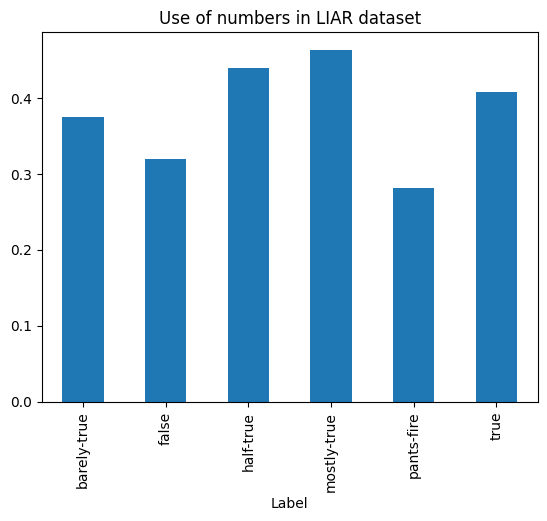

In [8]:
#count usesNumbs for each label AND PLOT
liar_df.groupby('Label')['UsesNumbs'].mean().plot(kind='bar')
#TITLE use of numbers
plt.title('Percentage of each category that usues numbers')
liar_df.groupby('Label')['UsesNumbs'].mean()

In [12]:
print('Percentage of Kaggle that uses numbers: ')
print(kaggle_df['UsesNumbs'].mean())

Percentage of Kaggle that uses numbers: 
0.1070649026682703


Truth
0    0.128104
1    0.083999
Name: UsesNumbs, dtype: float64

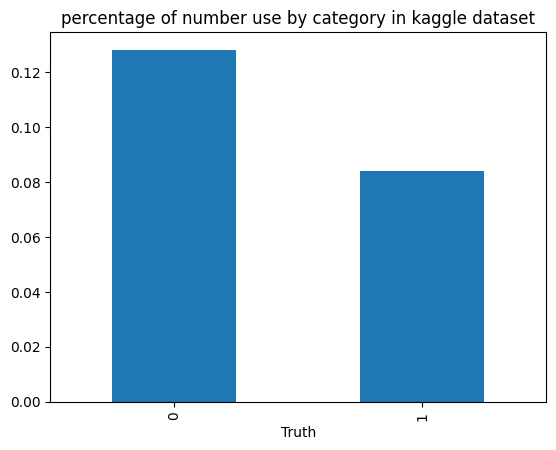

In [10]:
kaggle_df.groupby('Truth')['UsesNumbs'].mean().plot(kind='bar')
#TITLE use of numbers
plt.title('percentage of number use by category in kaggle dataset')
kaggle_df.groupby('Truth')['UsesNumbs'].mean()

In [8]:
#count of numbers in all lists in Numbs column for liar_df for Truth
print('percentage of news with numbers in title that are true for liar_df: ')
print(100*liar_df[liar_df['Truth'] == 1]['UsesNumbs'].sum() / liar_df['UsesNumbs'].sum(), 'percent')


percentage of news with numbers in title that are true for liar_df: 
55.13203786746388 percent


In [9]:
print('percentage of news with numbers that are true  in title for kaggle_df: ')
print(100*kaggle_df[kaggle_df['Truth'] == 1]['UsesNumbs'].sum() / kaggle_df['UsesNumbs'].sum(), 'percent')

percentage of news with numbers that are true  in title for kaggle_df: 
37.42458914083628 percent
